# Part II - (Ford GoBike System Data Explanation)
## by (Huda Taha)

## Investigation Overview


In this analysis, the primary focus is on trip duration and how it is affected by the other characteristics, such as age, gender, and user type.

## Dataset Overview

The FordBike system is a public bicycle sharing program that has been deployed in the San Francisco Bay Area and along the West Coast of California. Bay Wheels offers a broad range of bicycle sharing services at a regional scale.This data set includes information about individual rides made in a bike-sharing system.I will explore and analysis the data set to explore some insights
.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('C:/Users/HudaALAttasJEDSA/Documents/Project 5 -FordBike Visualaztion/dff_FordBike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.763833,35.0,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.687783,NaN,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.915467,47.0,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.180533,30.0,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.425417,45.0,23


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1 : Age Distrubution)

 Most of Ford GoBike riders are people between 20 to 40 years old

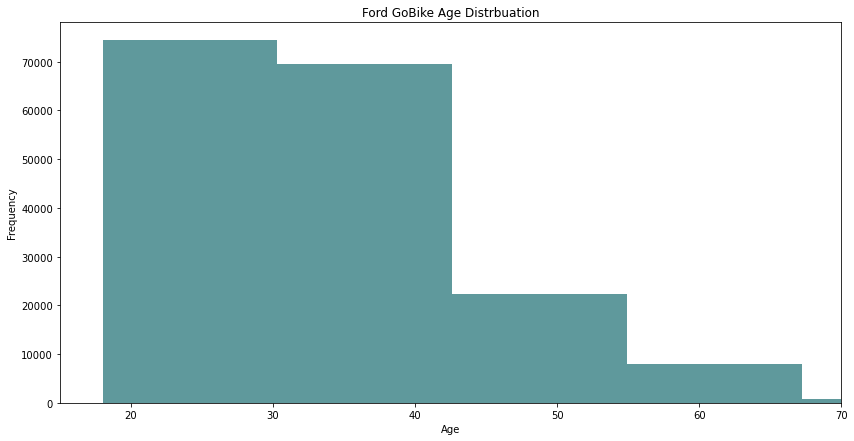

In [6]:
## age distrabutaion after fixing the tail of the histogram
plt.figure(figsize=[14,7])
plt.xlim([15, 70])
df['age'].plot(kind='hist',color="#5F999C")
plt.title('Ford GoBike Age Distrbuation');
plt.xlabel('Age');

## (Visualization 2 : Ford GoBike Gender Distrubation)

>You will observe from the below graph that Males represents 74.6% of the total data set while Femlas represents only 23.3%

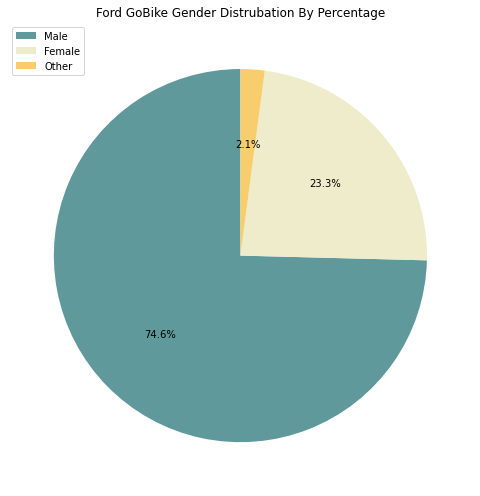

In [7]:
## Gender distrubation Percentage
plt.figure(figsize=[14,7])
labels = ['Male', 'Female', 'Other']
dataforgraph = list(df[df['member_gender'] != 'None']['member_gender'].value_counts())
colours = ["#5F999C",'#EEECCB','#F7CD6E']
plt.pie(dataforgraph,autopct='%1.1f%%',startangle=90,colors=colours)
plt.legend(labels)
plt.title('Ford GoBike Gender Distrubation By Percentage')
plt.tight_layout()

## (Visualization 3 : Ford GoBike User Type Distrubation)

Most Of Ford GoBike clients are subscribers . As showen in the below graph Subscribers proportion is around 8x Customers proportion . .

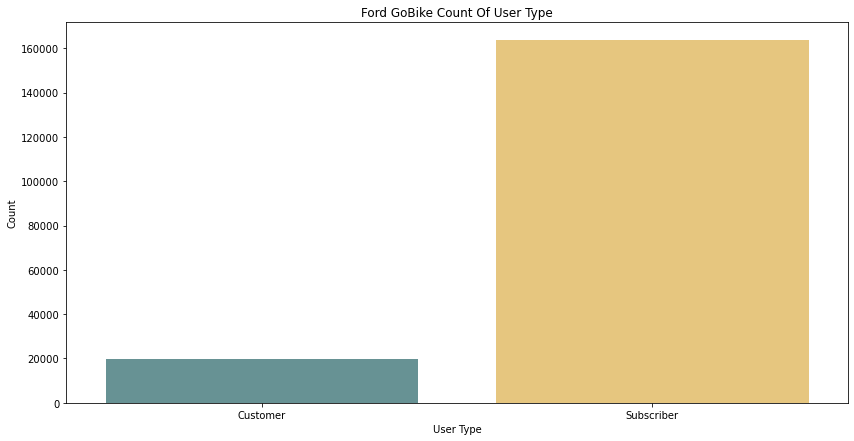

In [8]:
plt.figure(figsize=[14,7])
sns.countplot(data=df, x='user_type',palette=["#5F999C",'#F7CD6E']);
plt.title('Ford GoBike Count Of User Type')
plt.xlabel('User Type');
plt.ylabel('Count');

## (Visualization 4 : Ford GoBike Start Trip Hour Distrubutions)

The hourly distribution shows that the most trips occur around 8-9am and 5-6pm .These findings are reflect that trips at 8-9am are more likely to be to the work or school, And trips at 5-6pm  are more likely to be from work or school. 

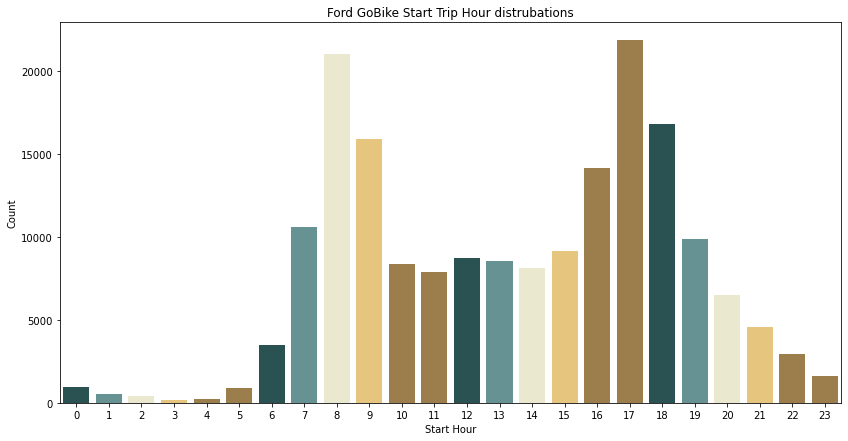

In [9]:
## Trip Hours distrubations
plt.figure(figsize=[14,7])
sns.countplot(data=df, x='start_hour',palette=['#245859',"#5F999C",'#EEECCB','#F7CD6E','#A9823F','#A9823F']);
plt.title('Ford GoBike Start Trip Hour distrubations')
plt.xlabel('Start Hour');
plt.ylabel('Count');

## (Visualization 5: Gender And Trip Duration In Minutes)

Although the fact that males represent the biggest proportion of the dataset . Females bikers takes longer trips compared to male bikers

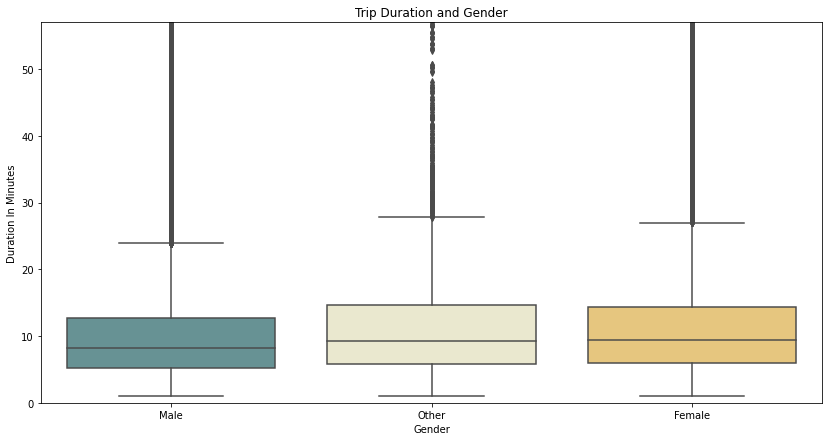

In [10]:
## Distrubation of user type based on gender
plt.figure(figsize = [14, 7])
sns.boxplot(data = df, x = 'member_gender', y = 'duration_min',palette=["#5F999C",'#EEECCB','#F7CD6E'])
plt.ylim([0, 57])
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration In Minutes')
plt.show()

## (Visualization 6 : User Type And Trip Duration In Minutes)

From The following box plot we can demonstrates that customers have a wider range of trips for short duration

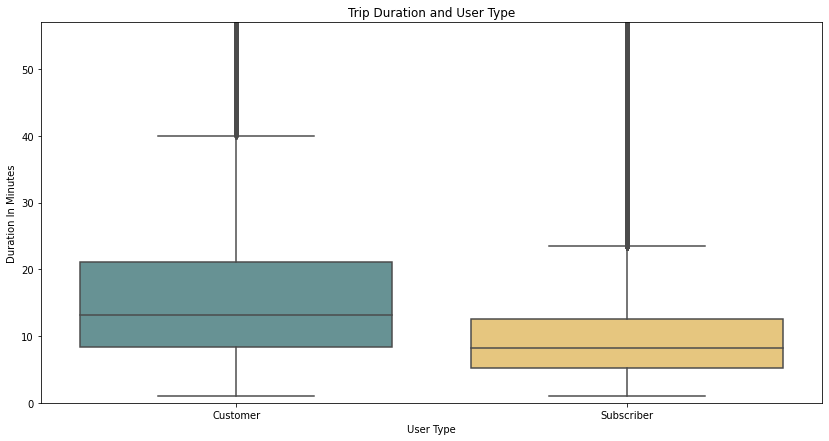

In [11]:
## box plot for user type and Trip duration in min
plt.figure(figsize = [14, 7])
sns.boxplot(data = df, x = 'user_type', y = 'duration_min',palette=["#5F999C",'#F7CD6E'])
plt.ylim([0, 57])
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration In Minutes')
plt.show()

## (Visualization 7 : Trip Duration Based On Age)

Users between the ages of 20 and 40 spend more time biking, which is very reasonable given that biking is affected by the health of the person.

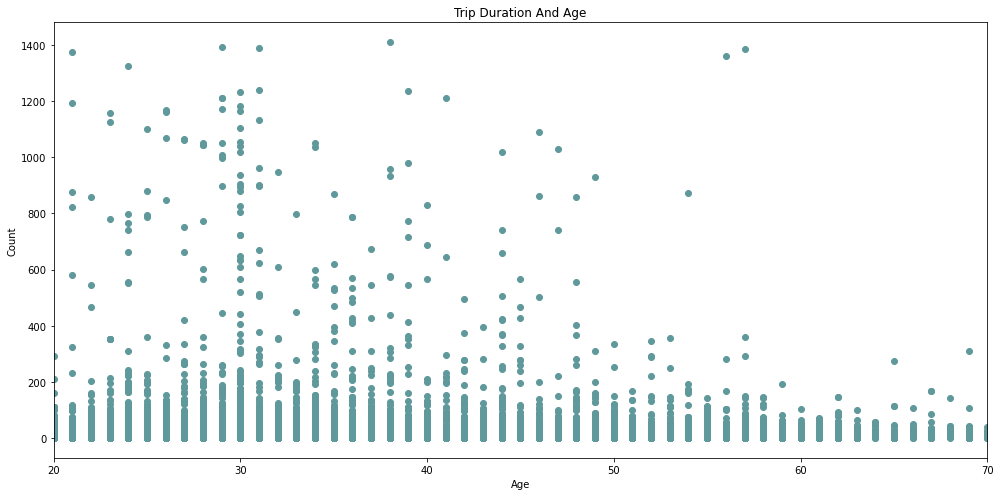

In [12]:
## Scatter plot for trip duratin based on age
plt.figure(figsize=[14,7])
plt.scatter(df['age'], df['duration_min'],color="#5F999C")
plt.xlim([20, 70])
plt.title('Trip Duration And Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 